<a href="https://colab.research.google.com/github/Chrisini/DecentNet/blob/master/torch_dreams_tutorial_modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Torch-dreams

Source: https://github.com/Mayukhdeb/torch-dreams/ 

This library was heavily inspired from: [Feature Visualization: How neural networks build up their understanding of images](https://distill.pub/2017/feature-visualization/)

<img src = "https://github.com/Mayukhdeb/torch-dreams/blob/master/images/banner_segmentation_model.png?raw=true">


In [2]:
device = "cpu"

In [1]:
if True:
    # install torch dreams
    !pip install torch-dreams  --upgrade

    # install opencv
    !pip install opencv-python


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from torch_dreams import Dreamer
import torchvision.models as models
plt.rcParams['figure.figsize'] = 5,5

import cv2


## Minimal example

In [4]:
model = models.inception_v3(pretrained=True)
dreamy_boi = Dreamer(model, device = device, quiet =  False)

Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth


  0%|          | 0.00/104M [00:00<?, ?B/s]

100%|██████████| 120/120 [00:37<00:00,  3.18it/s]


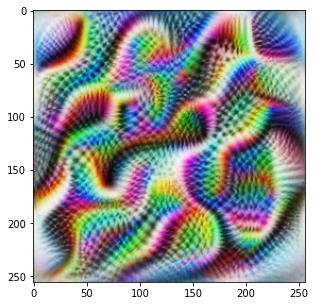

In [5]:
image_param = dreamy_boi.render(
    layers = [model.Mixed_5c],
)
plt.imshow(image_param)
plt.show()

## Visualizing individual channels


We basically optimize the input image to maximize activations of a certain channel of a layer in the neural network.

The next step now would be to define a `custom_func` that would enable use to selectively optimize a single channel. We could've made a simpler function, but this would be useful when we'll be running the optimizations on a lot of channels

In [6]:
"""
feel free to use more layers for experiments 
"""
layers_to_use = [model.Mixed_6b.branch1x1.conv]

def make_custom_func(layer_number = 0, channel_number= 0): 
    def custom_func(layer_outputs):
        loss = layer_outputs[layer_number][channel_number].mean()
        return -loss
    return custom_func

Now in order to optimize the **7th channel** of the **first layer** mentioned in `layers_to_use` we define the custom loss as:



In [7]:
my_custom_func = make_custom_func(layer_number= 0, channel_number = 119)

100%|██████████| 200/200 [00:59<00:00,  3.38it/s]


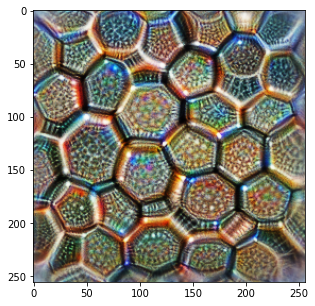

In [8]:
image_param = dreamy_boi.render(
    layers = layers_to_use,
    custom_func = my_custom_func,
    iters = 200
)
plt.imshow(image_param)
plt.show()

In [9]:
# using own image
# image_path = 'data/eye/34_training.tif'
# image_path = 'noise.jpg'
image_path = 'fish.jpg'

In [10]:
from torch_dreams.custom_image_param import CustomImageParam

In [11]:
my_custom_func = make_custom_func(layer_number = 0, channel_number = 19)
layers_to_use = [model.Mixed_5b.branch5x5_1.conv]

In [12]:
param = CustomImageParam(image = image_path, device = device)

image_param = dreamy_boi.render(
    image_parameter= param,
    layers = layers_to_use,
    lr = 2e-4, # PARAMETER
    iters = 200,  # PARAMETER
    custom_func = my_custom_func
)

100%|██████████| 200/200 [06:04<00:00,  1.82s/it]


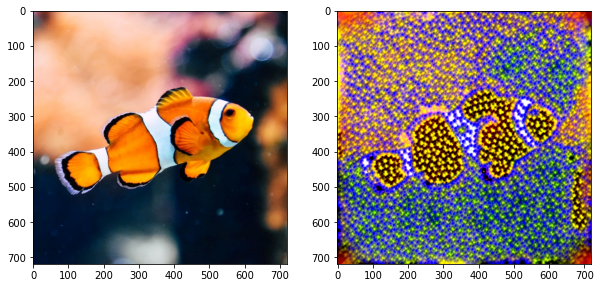

In [13]:
fig, ax = plt.subplots(nrows= 1, ncols= 2, figsize=(10,5))
try:
    ax.flat[0].imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
except:
    ax.flat[0].imshow(cv2.imread(image_path))
    
ax.flat[1].imshow(image_param)